In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from utilities import get_region_border
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import datetime

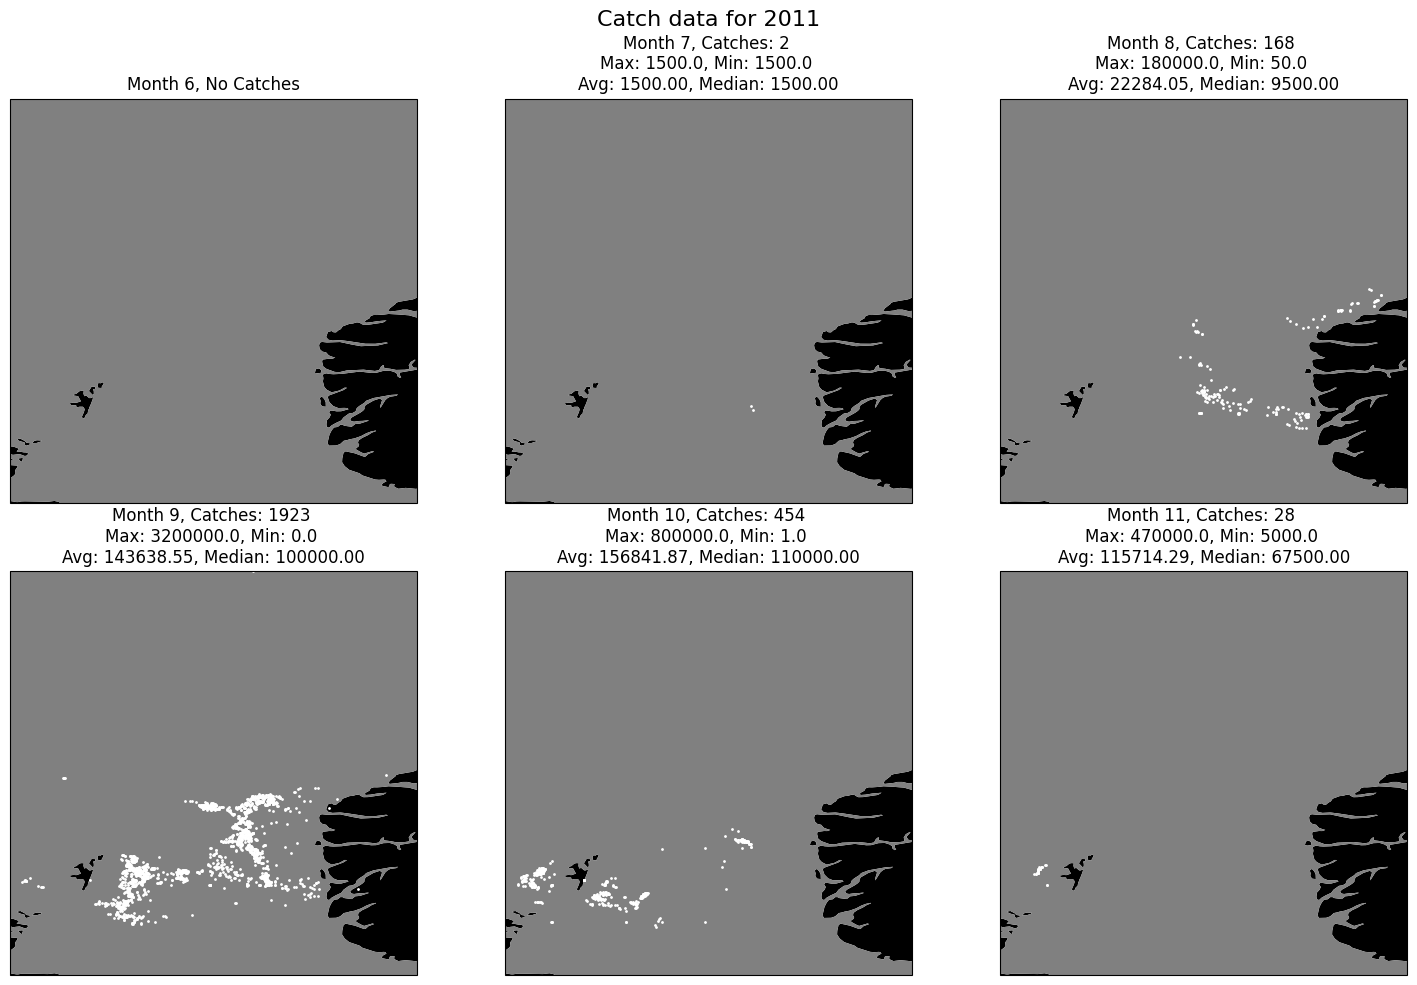

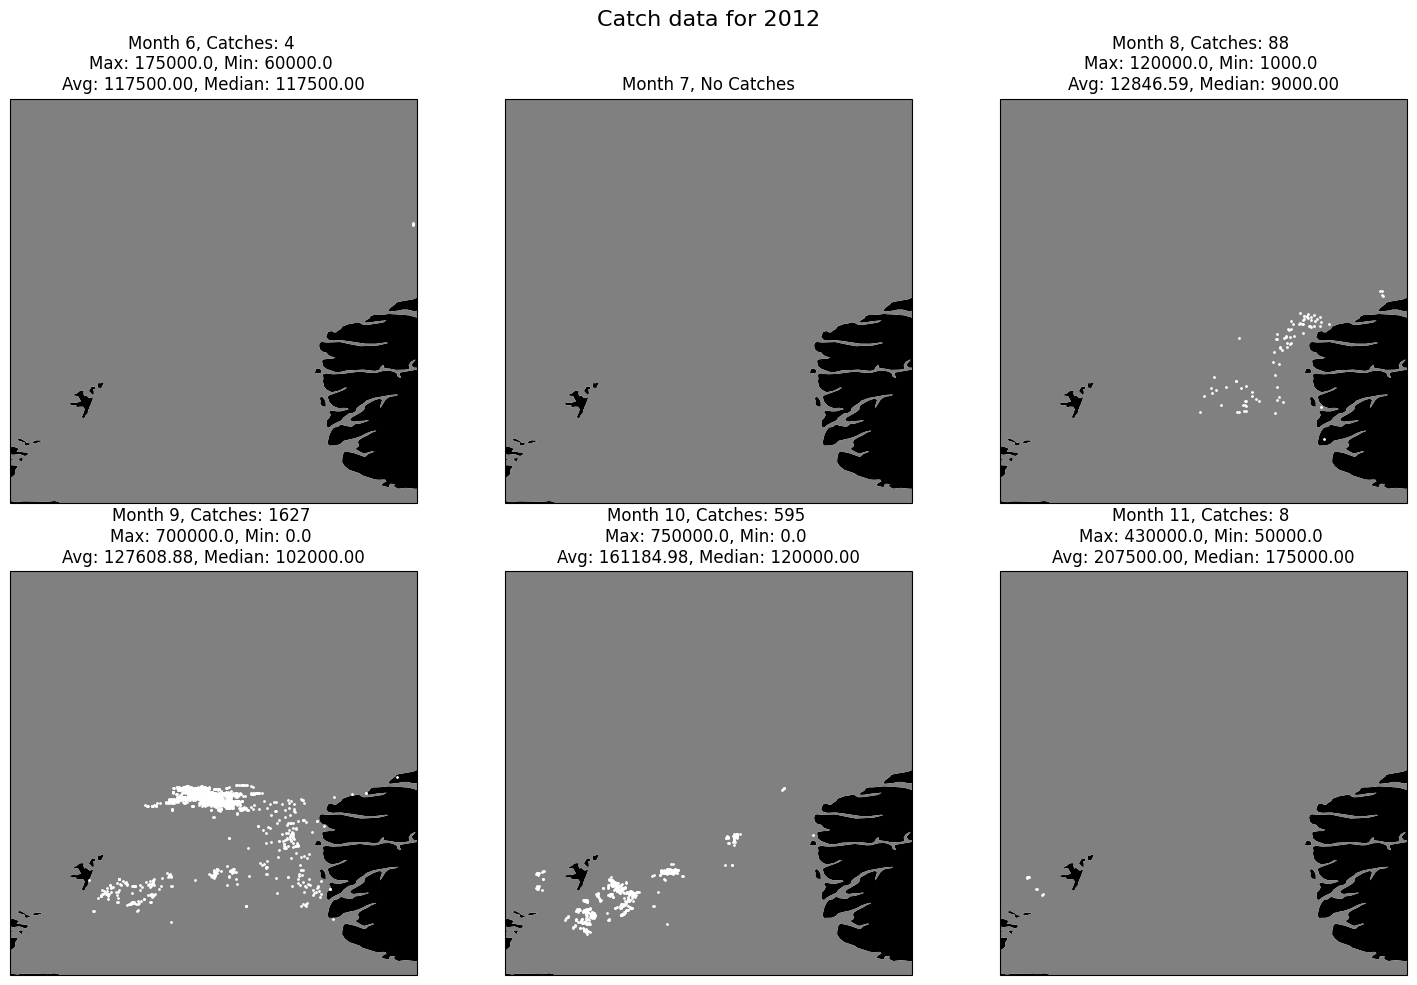

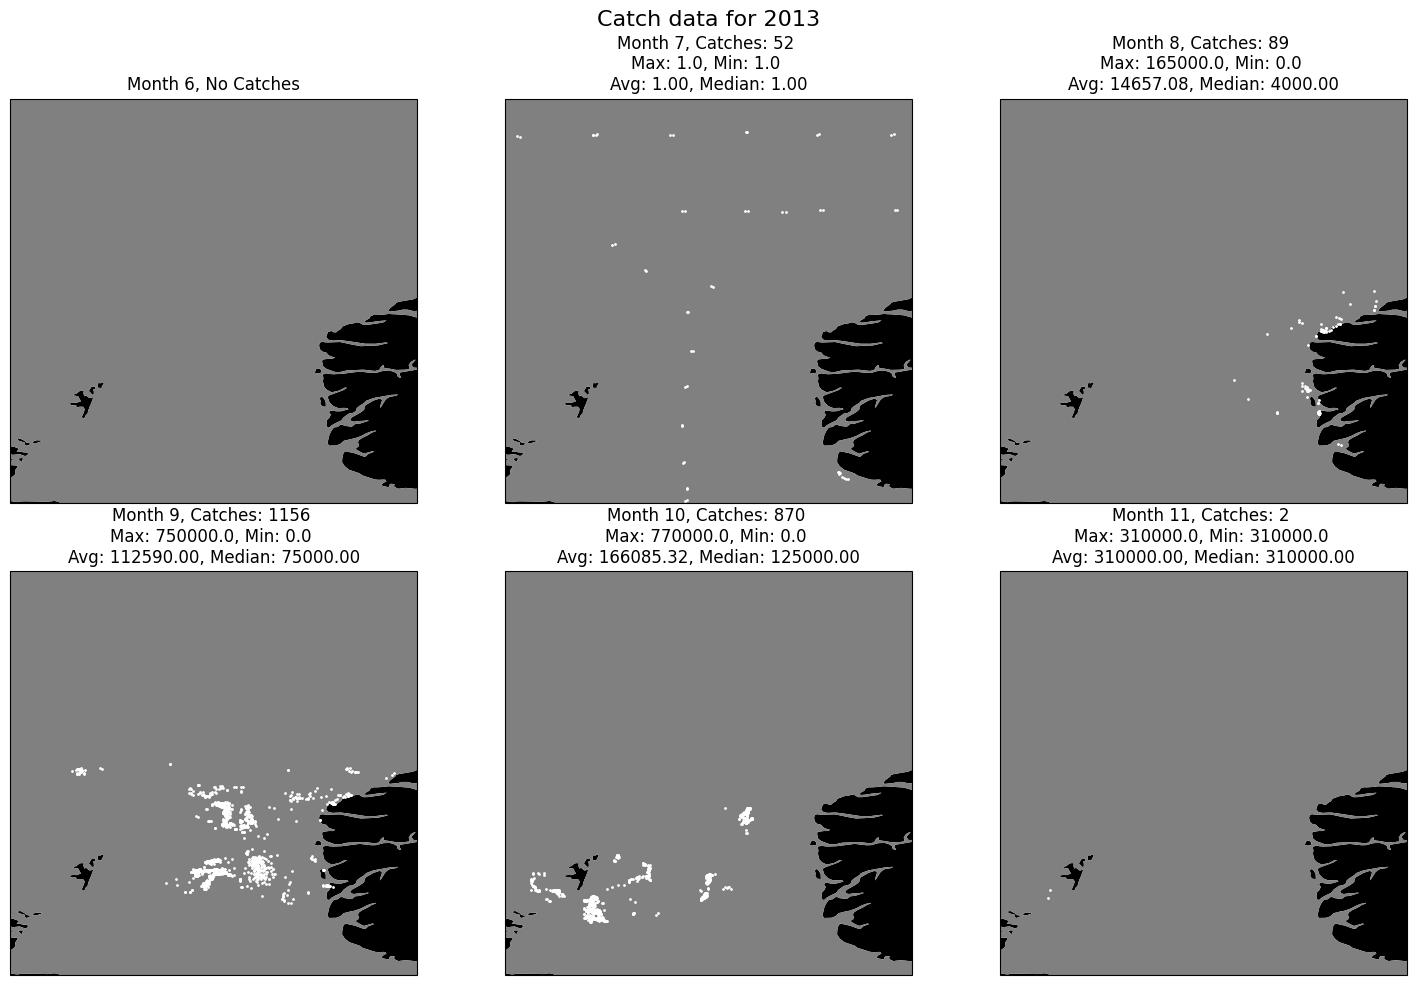

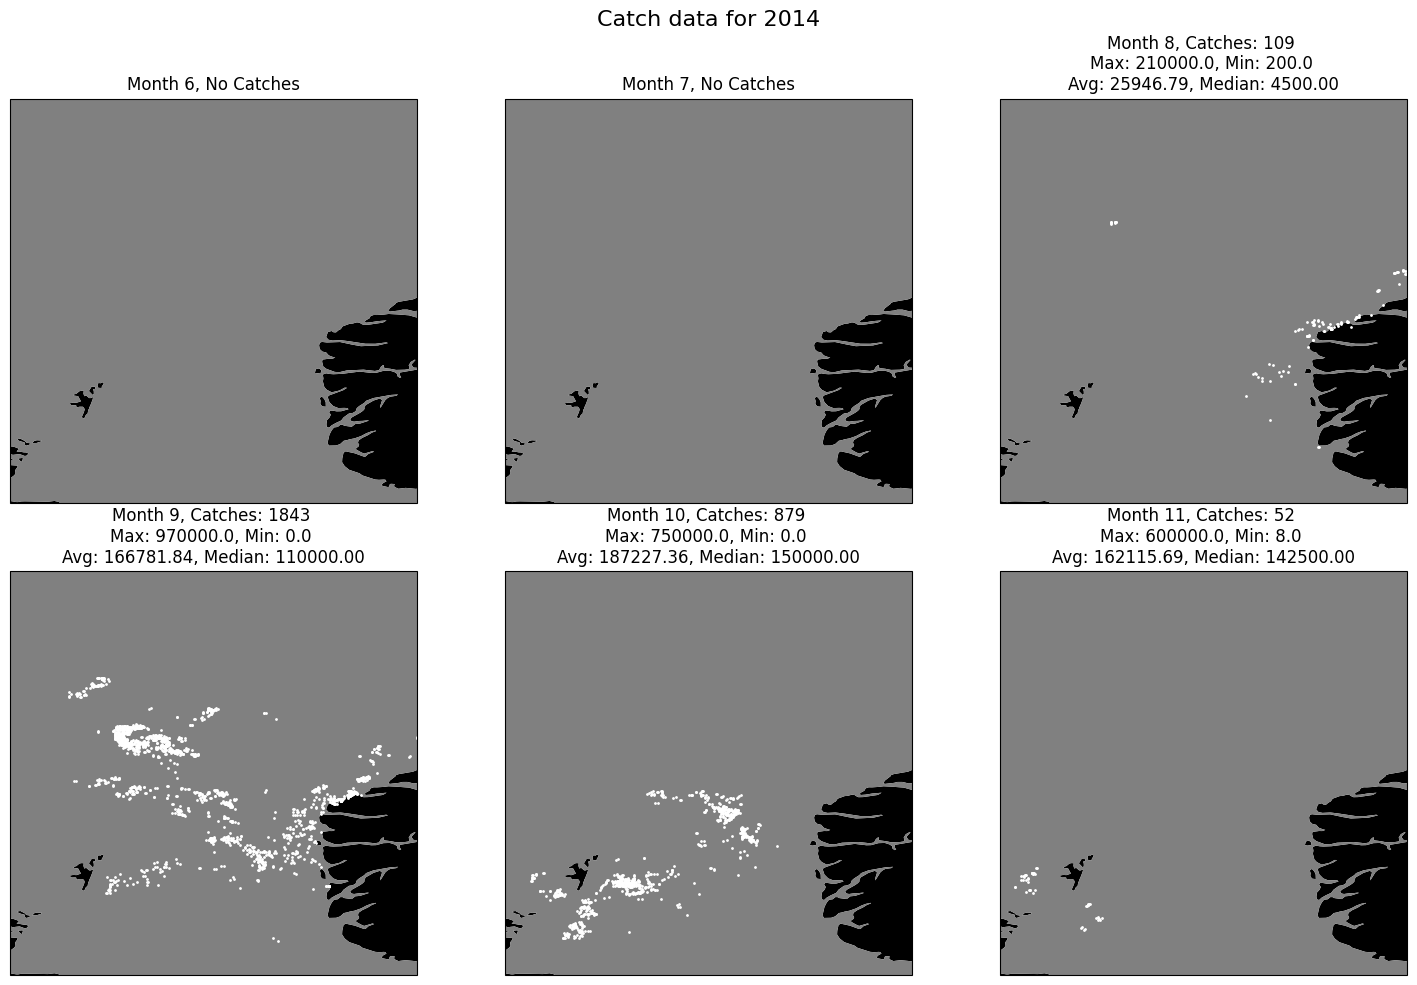

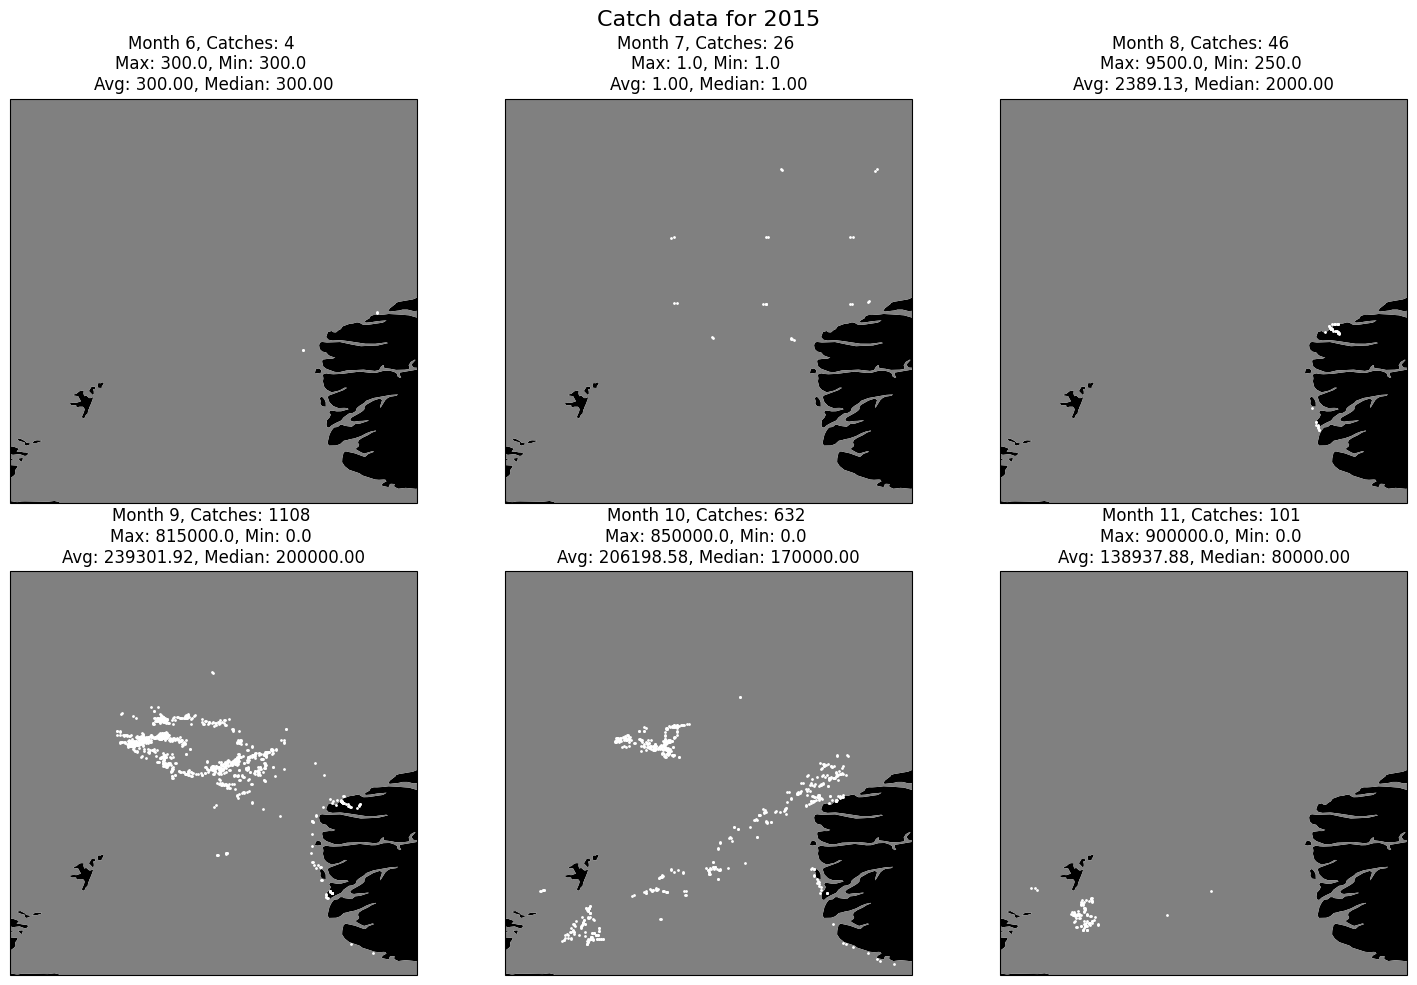

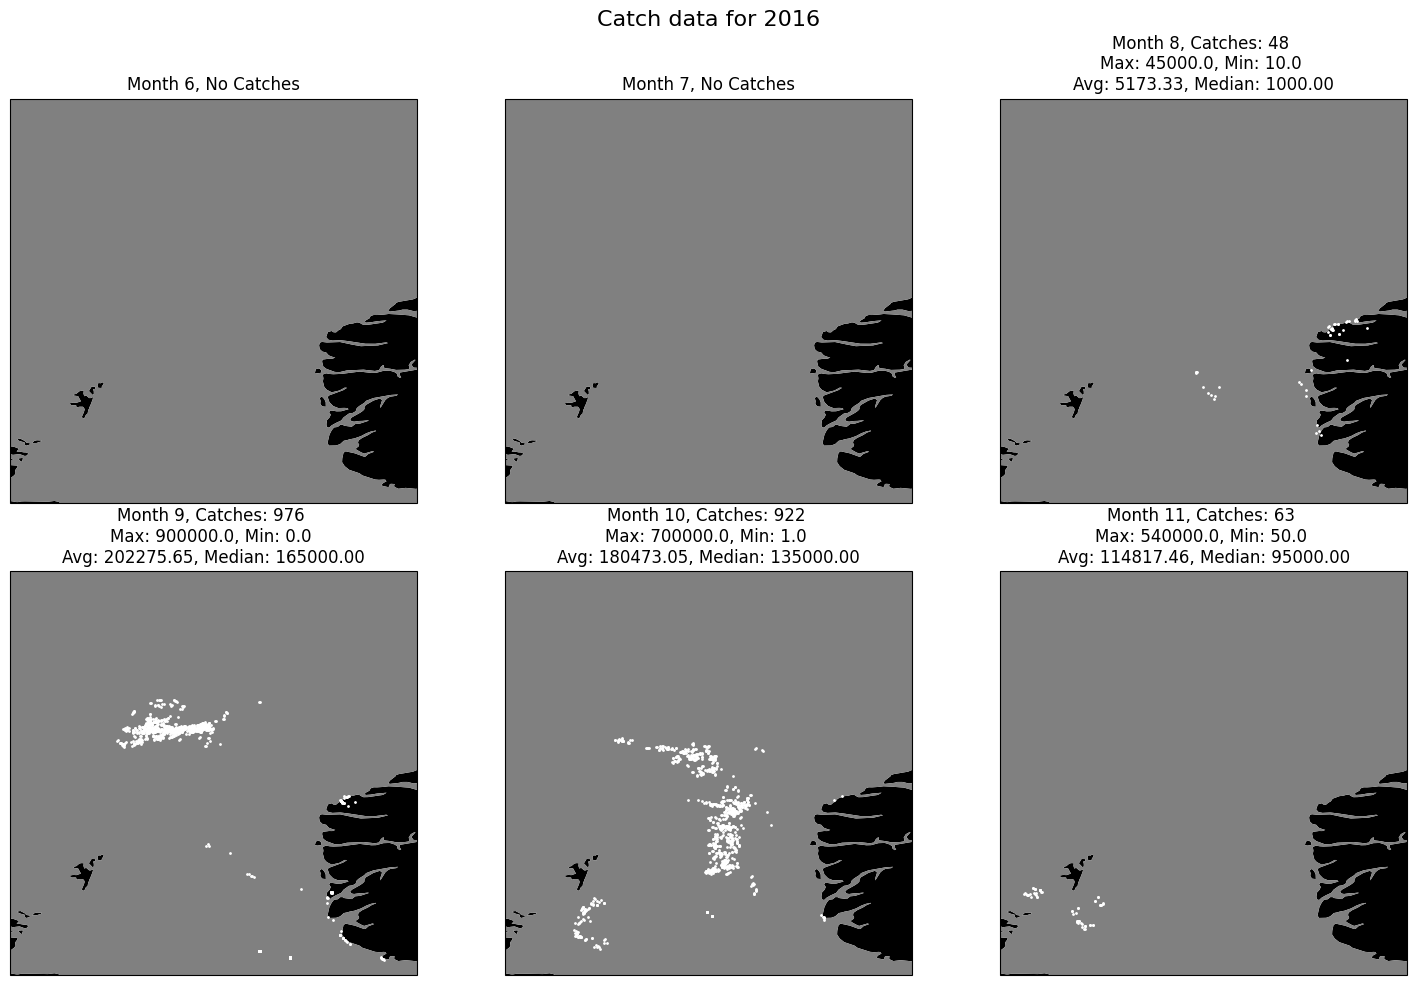

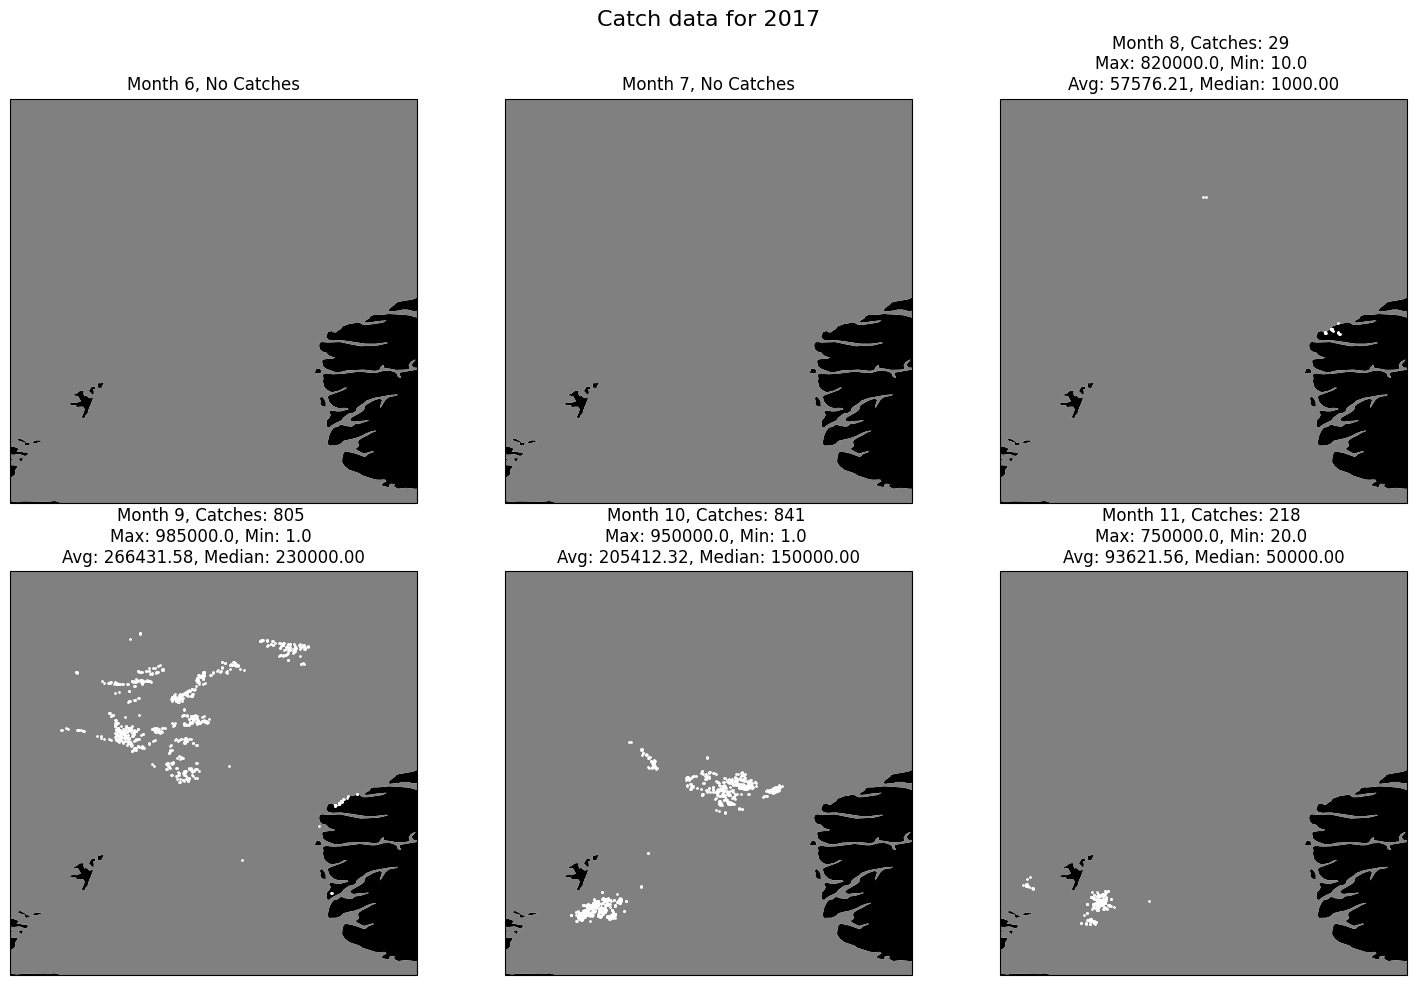

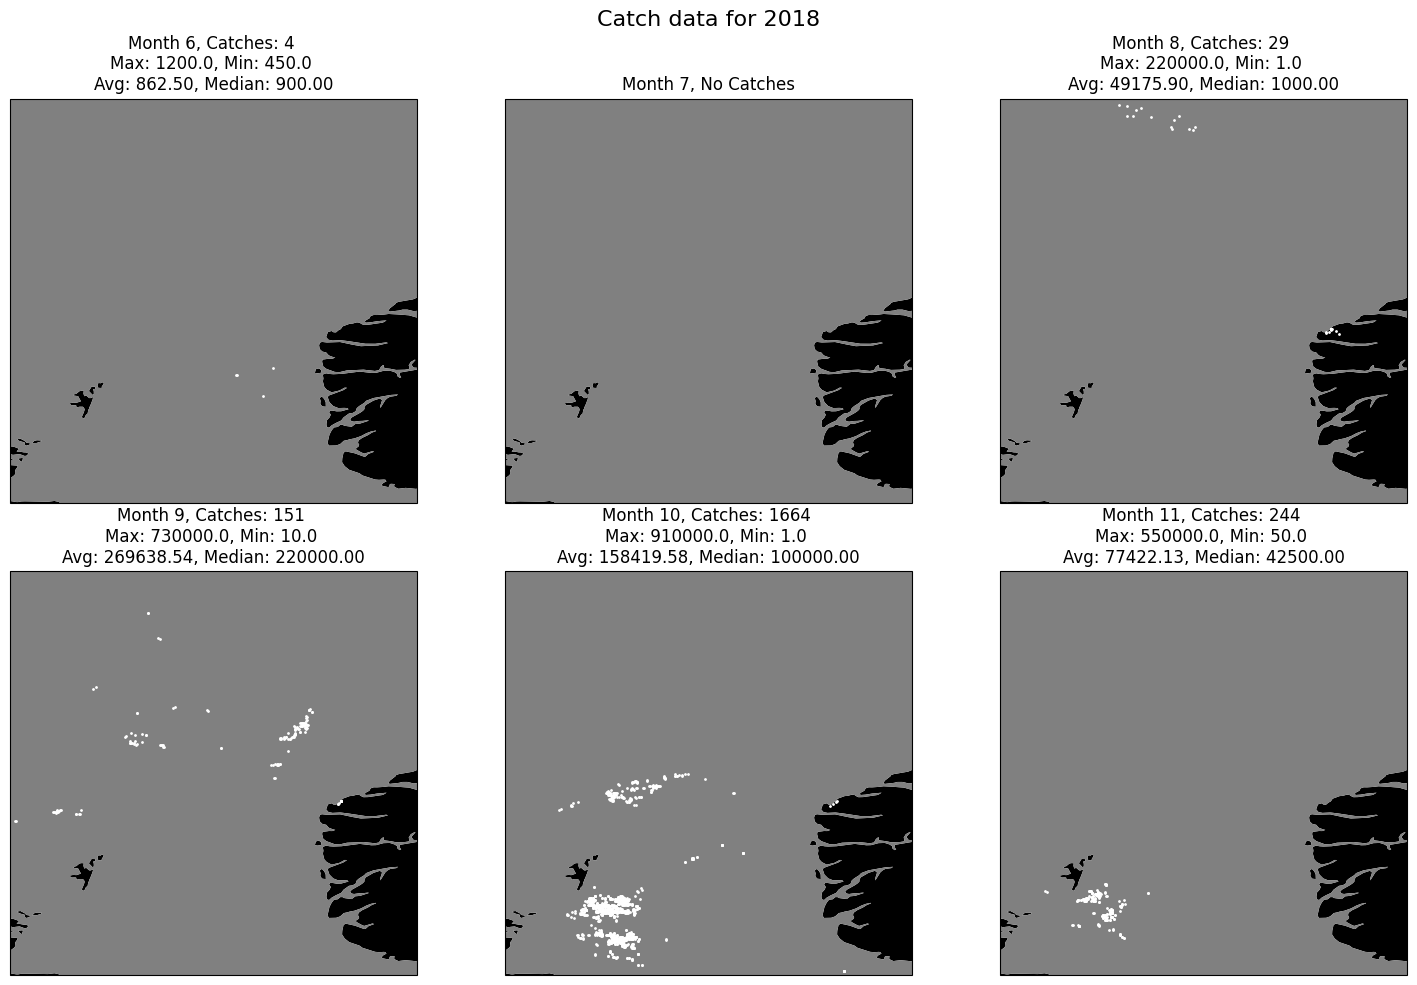

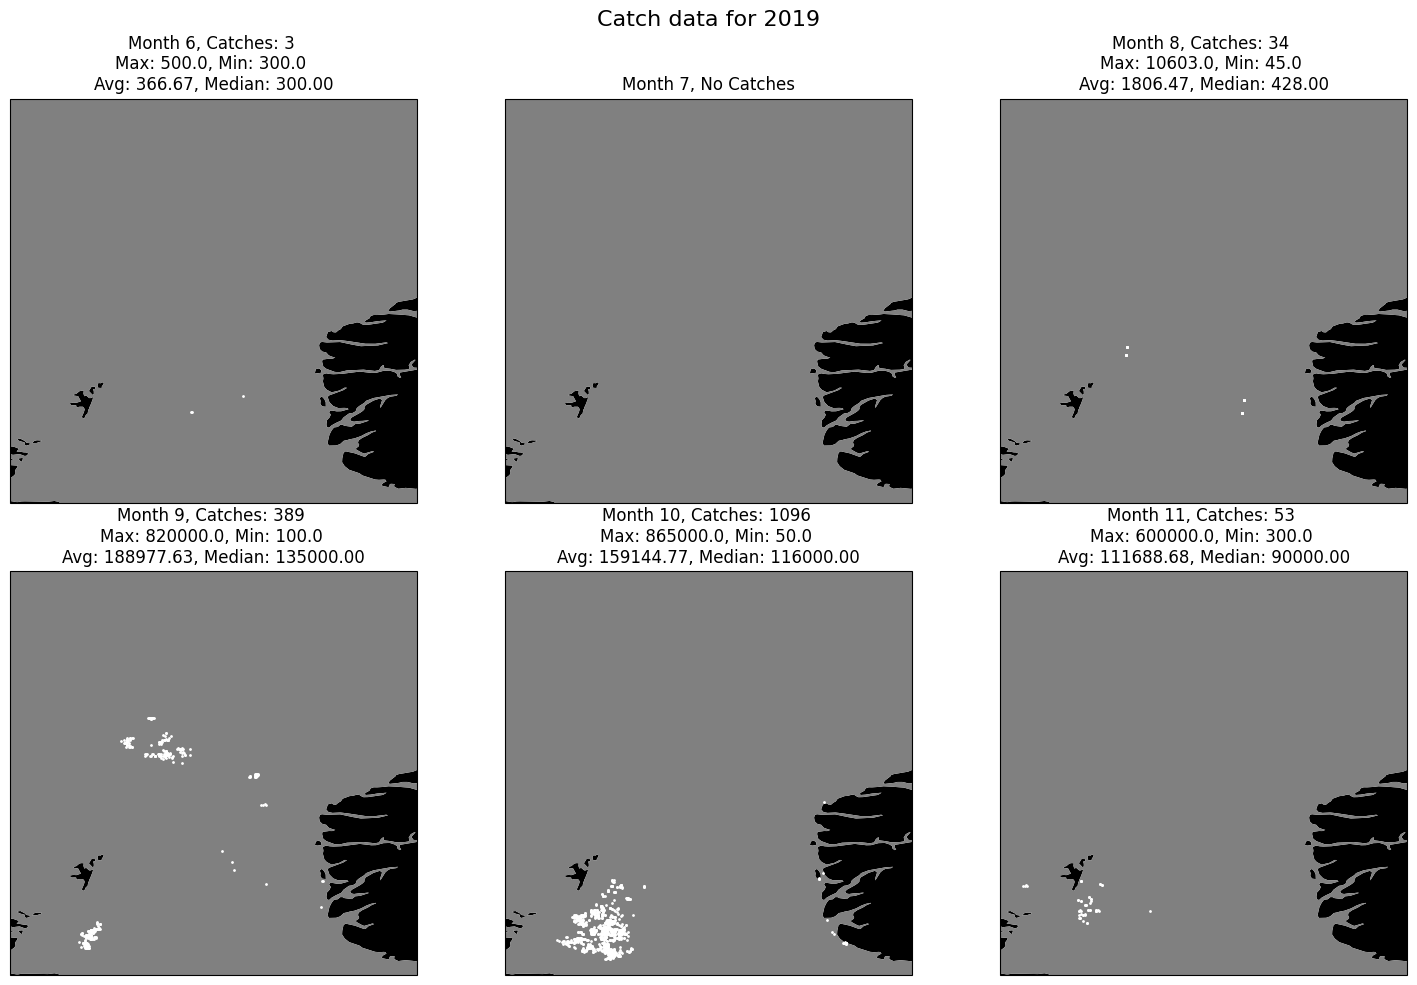

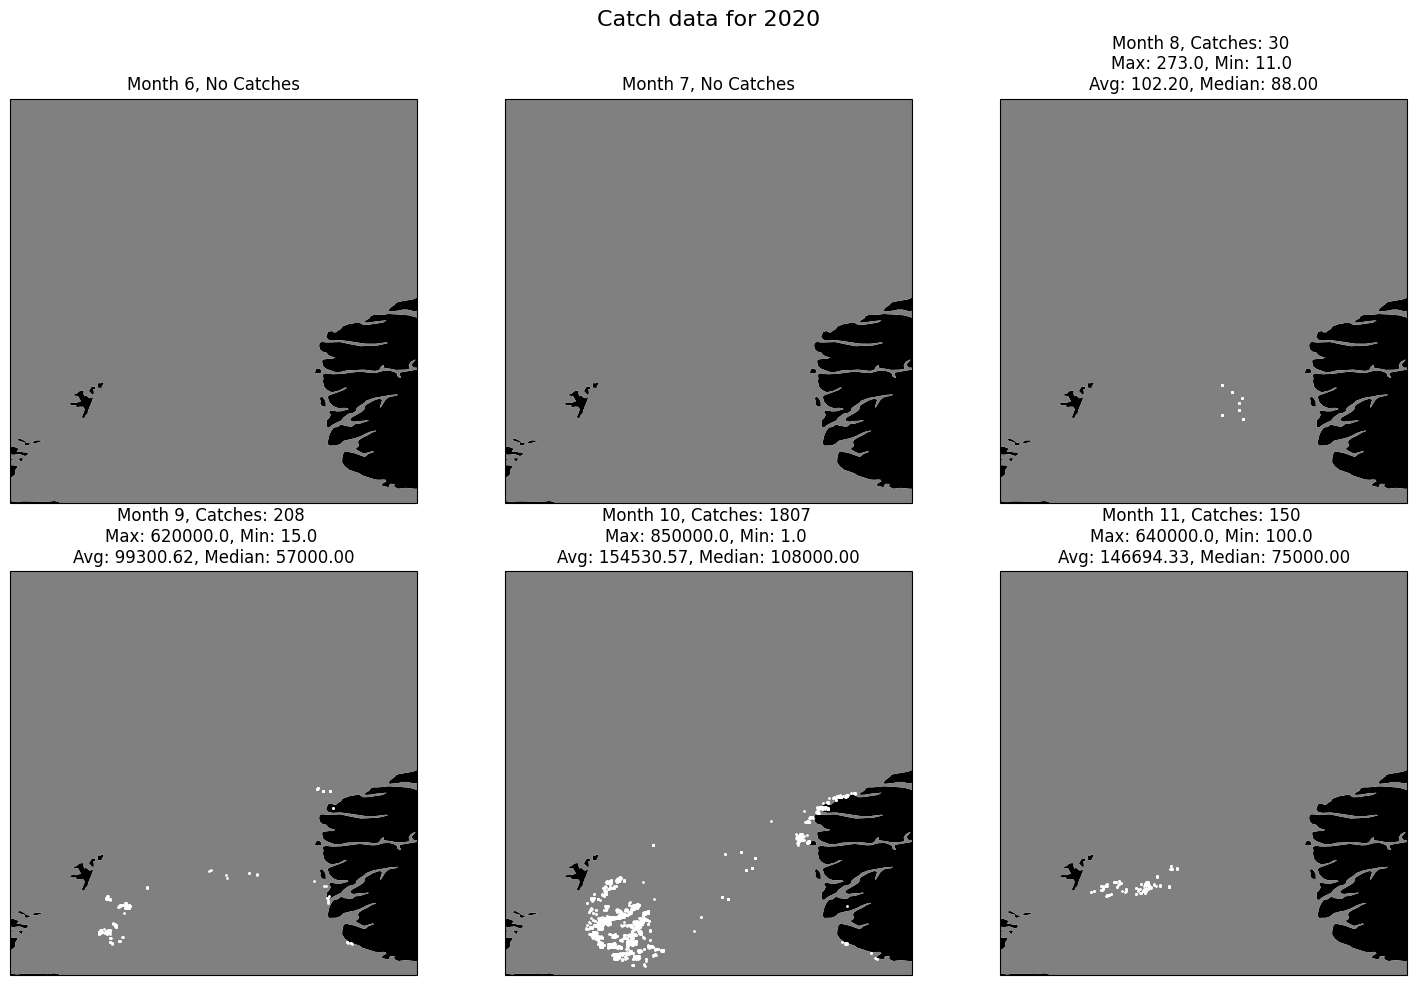

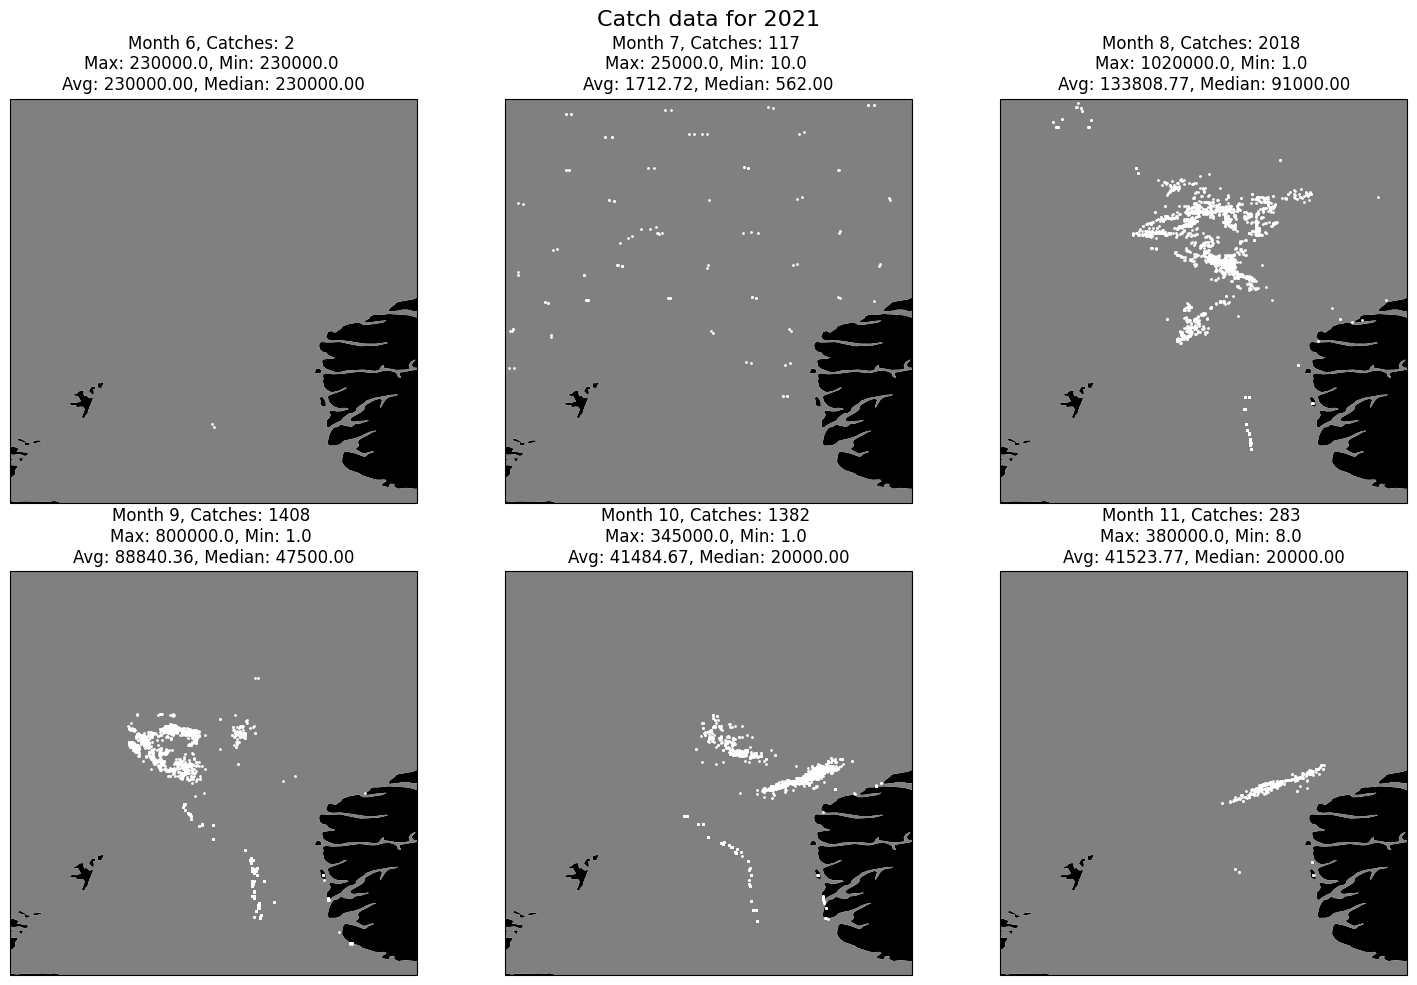

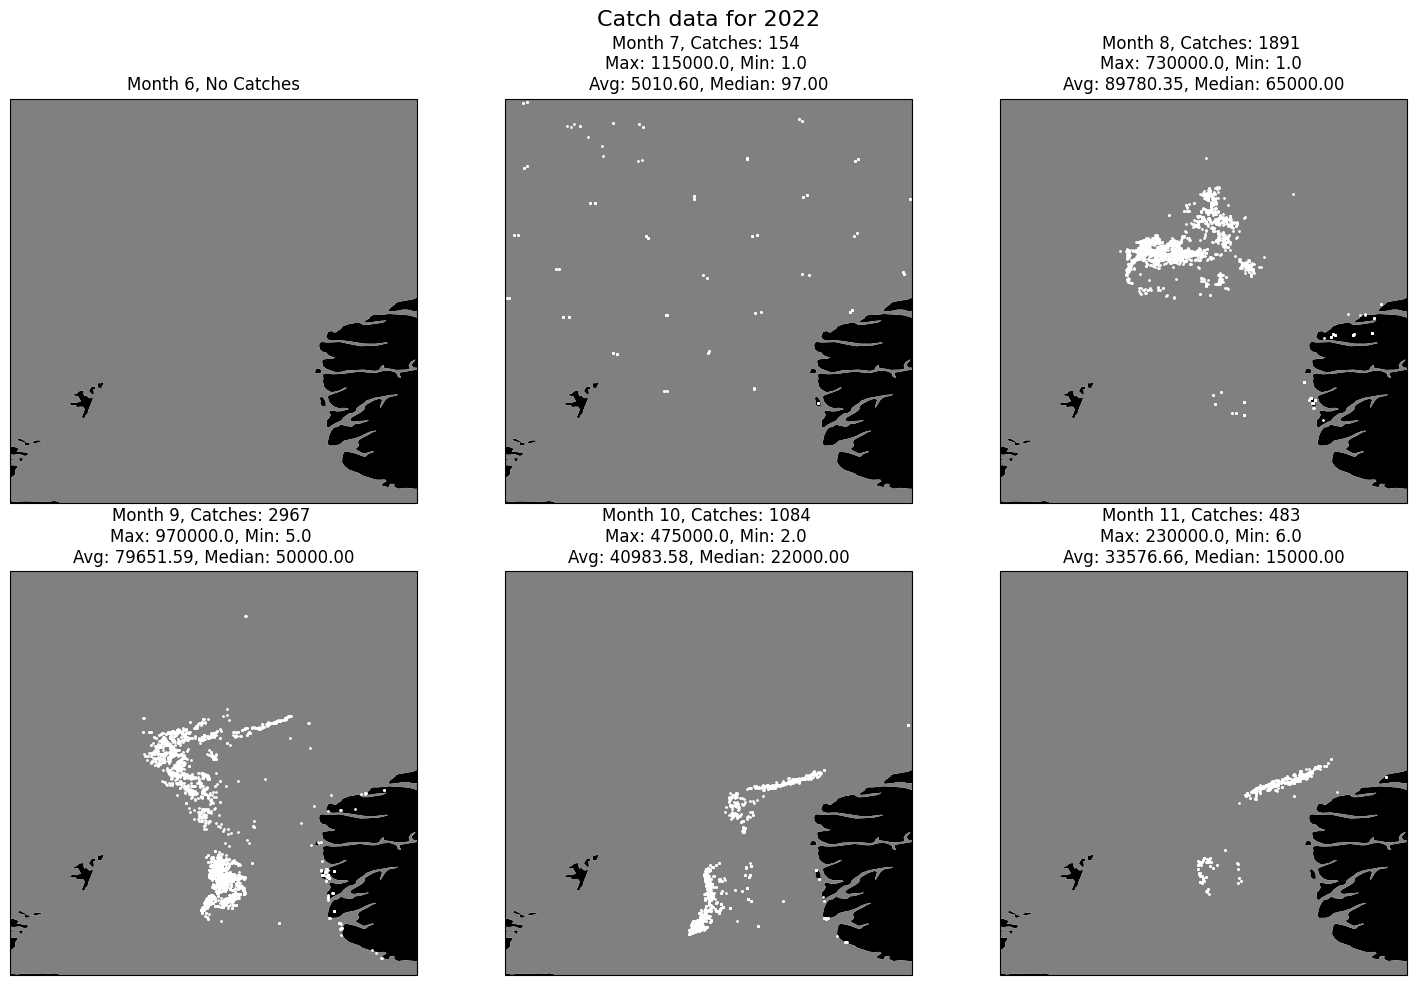

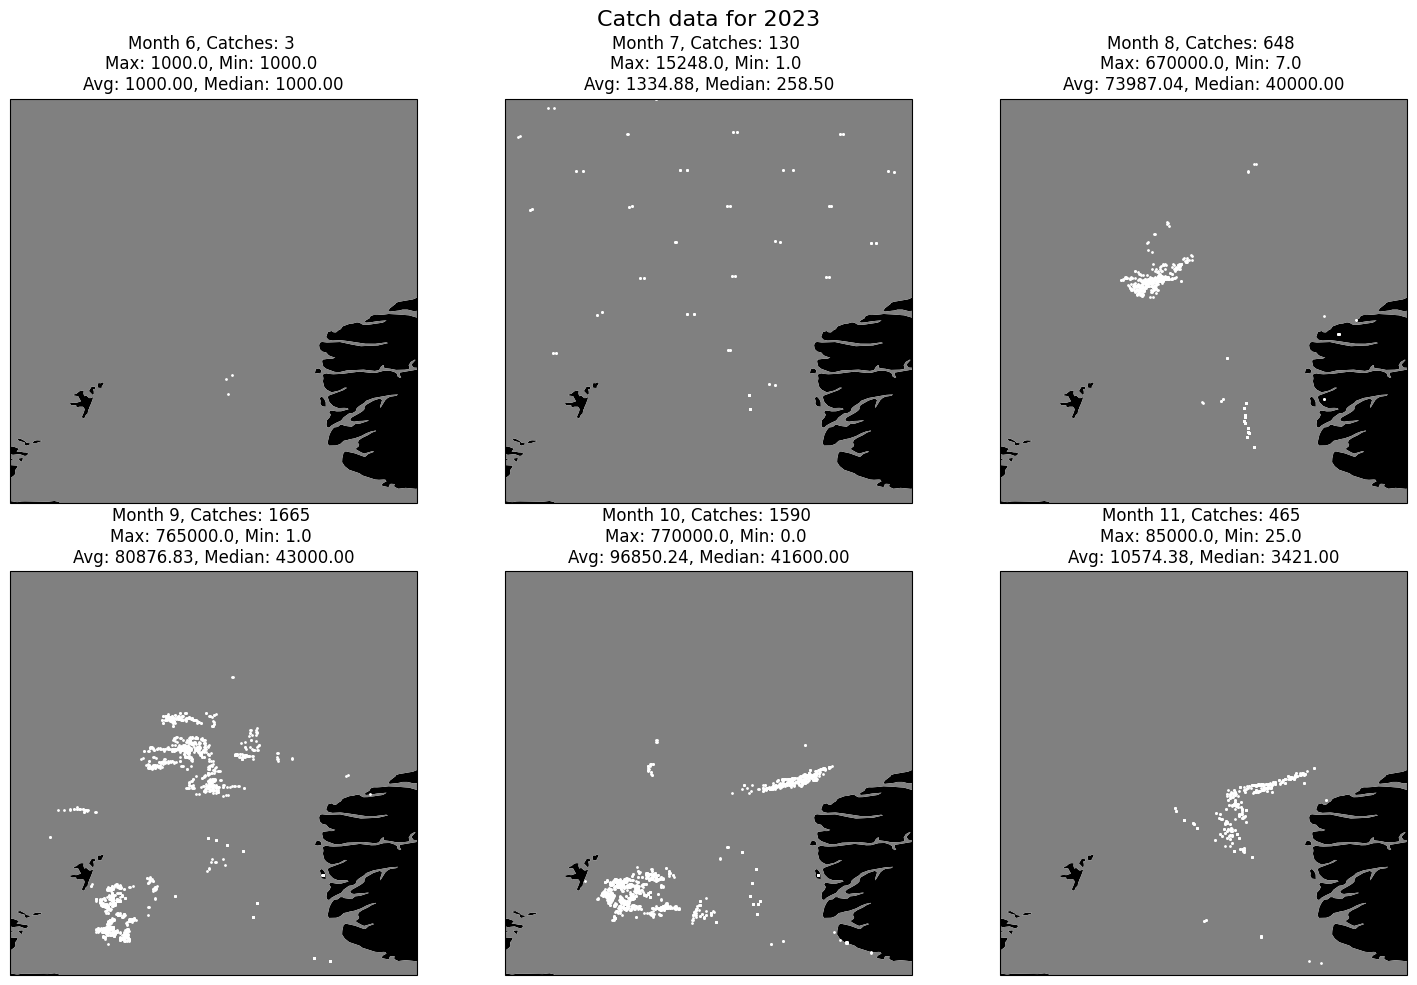

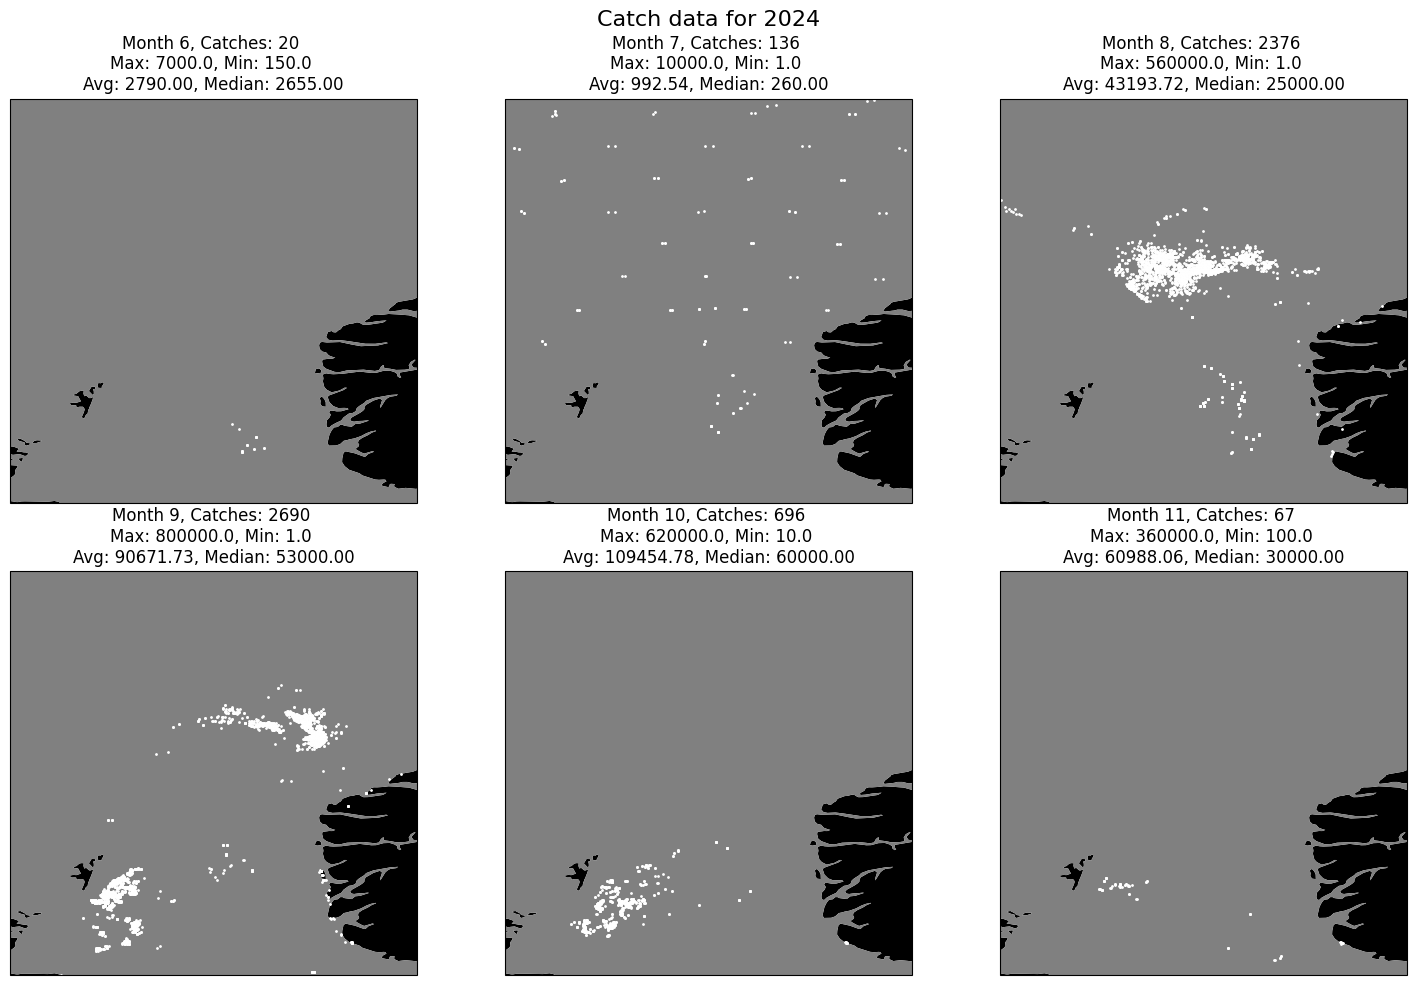

In [ ]:
PATH = '/home/anna/msc_oppgave/fish-forecast/ERS_VMS_download_area_2011_2024_jun_nov.csv'
df_full = pd.read_csv(PATH, sep=';')
region = get_region_border('areas.json', 'test')

#Remove rows with catch outside the region
df = df_full[(df_full['CatchLat'].astype(float) >= region["SW"]["lat"]) & 
                  (df_full['CatchLat'].astype(float) <= region["NE"]["lat"]) & 
                  (df_full['CatchLon'].astype(float) >= region["SW"]["lon"]) & 
                  (df_full['CatchLon'].astype(float) <= region["NE"]["lon"])]

statistics_dict = {}

for y in range(2011, 2025):
    df_year = df[df['Date'].str.contains(str(y))]

    # Make subplots 2x3
    proj = ccrs.PlateCarree()
    fig, axs = plt.subplots(2, 3, figsize=(15, 10), subplot_kw={'projection': proj})
    fig.suptitle(f'Catch data for {y}', fontsize=16)

    for m in range(6, 12):
        df_month = df_year[df_year['Date'].str.contains(f'-{m:02d}-')]

        lats = df_month["CatchLat"].astype(float).tolist()
        lons = df_month["CatchLon"].astype(float).tolist()

        weights = df_month["Rundvekt"].astype(float).tolist()
        max_weight = max(weights) if weights else 0  # Avoid division by zero
        min_weight = min(weights) if weights else 0
        avg_weight = sum(weights) / len(weights) if weights else 0  
        median_weight = pd.Series(weights).median() if weights else 0
        extent = [
            region["SW"]["lon"],  # minimum longitude
            region["NE"]["lon"],  # maximum longitude
            region["SW"]["lat"],  # minimum latitude
            region["NE"]["lat"]   # maximum latitude
        ]
        axs[(m-6)//3, (m-6)%3].set_extent(extent, crs=proj)

        axs[(m-6)//3, (m-6)%3].add_feature(cfeature.LAND.with_scale('50m'), facecolor='black')
        axs[(m-6)//3, (m-6)%3].add_feature(cfeature.OCEAN.with_scale('50m'), facecolor='grey')

        if lats and lons:  # Only plot if there are catches.
            axs[(m-6)//3, (m-6)%3].scatter(lons, lats, s=1, c='white', transform=proj, alpha=1.0)
        if len(lats) > 0:
            axs[(m-6)//3, (m-6)%3].set_title(f'Month {m}, Catches: {len(lats)} \nMax: {max_weight}, Min: {min_weight} \nAvg: {avg_weight:.2f}, Median: {median_weight:.2f}', fontsize=12)
        else:
            axs[(m-6)//3, (m-6)%3].set_title(f'Month {m}, No Catches', fontsize=12)
        if f'Y{y}' not in statistics_dict:
            statistics_dict[f'Y{y}'] = {}
        statistics_dict[f'Y{y}'][f'M{m}'] = {
            'max_weight': max_weight,
            'min_weight': min_weight,
            'avg_weight': avg_weight,
            'median_weight': median_weight,
            'num_catches': len(lats),
            'lats': lats,
            'lons': lons
        }

    plt.tight_layout()
    plt.show()

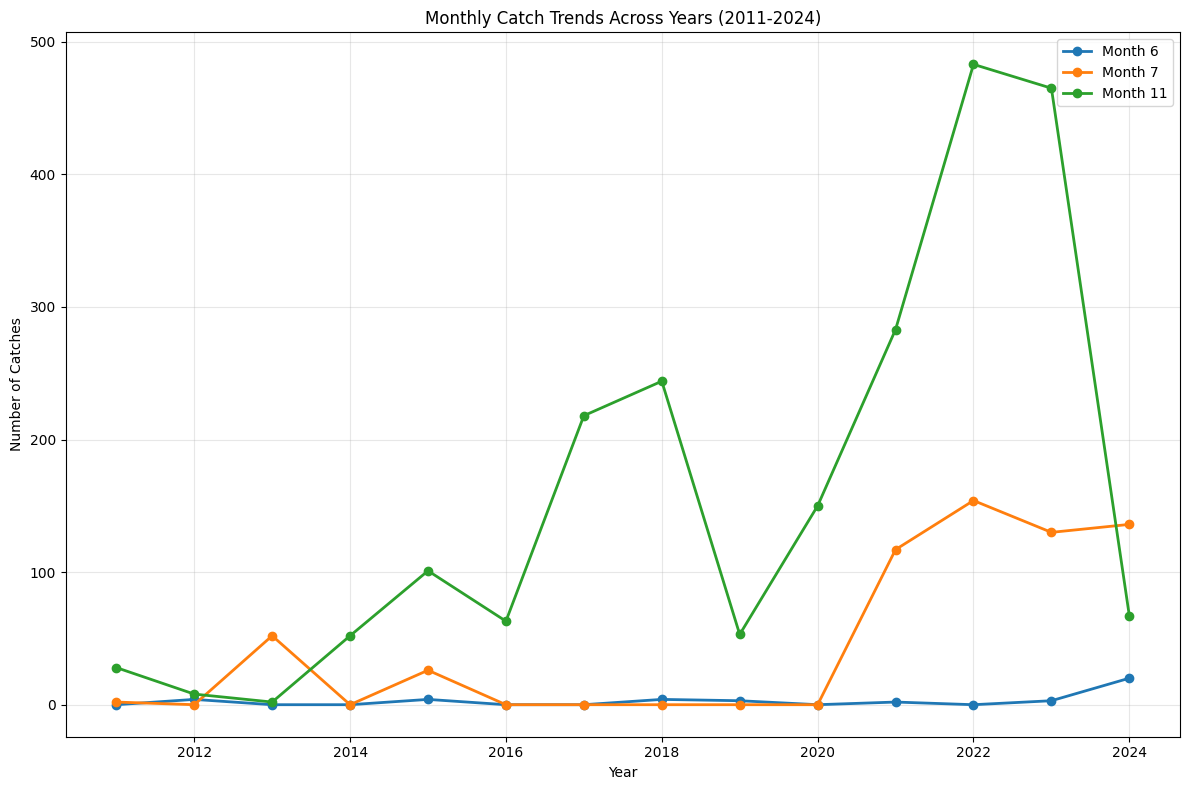

Statistics for Y2011:
  M6:
    Max Weight: 0
    Min Weight: 0
    Avg Weight: 0.00
    Median Weight: 0.00
    Number of Catches: 0
    N Lats: 0
    N Lons: 0
  M7:
    Max Weight: 1500.0
    Min Weight: 1500.0
    Avg Weight: 1500.00
    Median Weight: 1500.00
    Number of Catches: 2
    N Lats: 2
    N Lons: 2
  M8:
    Max Weight: 180000.0
    Min Weight: 50.0
    Avg Weight: 22284.05
    Median Weight: 9500.00
    Number of Catches: 168
    N Lats: 168
    N Lons: 168
  M9:
    Max Weight: 3200000.0
    Min Weight: 0.0
    Avg Weight: 143638.55
    Median Weight: 100000.00
    Number of Catches: 1923
    N Lats: 1923
    N Lons: 1923
  M10:
    Max Weight: 800000.0
    Min Weight: 1.0
    Avg Weight: 156841.87
    Median Weight: 110000.00
    Number of Catches: 454
    N Lats: 454
    N Lons: 454
  M11:
    Max Weight: 470000.0
    Min Weight: 5000.0
    Avg Weight: 115714.29
    Median Weight: 67500.00
    Number of Catches: 28
    N Lats: 28
    N Lons: 28
Statistics for Y201

In [30]:

# Plot the total number of catches for each month across all years
months_summary = {'M6': [], 'M7': [], 'M8': [], 'M9': [], 'M10': [], 'M11': []}
total_catches = {f'M{m}': 0 for m in range(6, 12)}
for year, months in statistics_dict.items():
    for month, stats in months.items():
        months_summary[month].append(stats['num_catches'])
# Plot the total number of catches for each month across all years
total_catches = {f'M{m}': sum(months_summary[f'M{m}']) for m in range(6, 12)}

# Plot all months in one figure
fig, ax = plt.subplots(figsize=(12, 8))

# Plot each month's data across years
for month in ['M6', 'M7', 'M8', 'M9', 'M10', 'M11']:
    if month in ['M8', 'M9', 'M10']:
        continue
    years = list(range(2011, 2011 + len(months_summary[month])))
    ax.plot(years, months_summary[month], marker='o', label=f'Month {month[1:]}', linewidth=2)

ax.set_xlabel('Year')
ax.set_ylabel('Number of Catches')
ax.set_title('Monthly Catch Trends Across Years (2011-2024)')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
    


# Print the statistics dictionary in a readable format
for year, months in statistics_dict.items():
    print(f"Statistics for {year}:")
    for month, stats in months.items():
        print(f"  {month}:")
        print(f"    Max Weight: {stats['max_weight']}")
        print(f"    Min Weight: {stats['min_weight']}")
        print(f"    Avg Weight: {stats['avg_weight']:.2f}")
        print(f"    Median Weight: {stats['median_weight']:.2f}")
        print(f"    Number of Catches: {stats['num_catches']}")
        print(f"    N Lats: {len(stats['lats'])}")  # Print number of latitudes
        print(f"    N Lons: {len(stats['lons'])}")  # Print number of longitudes

In [10]:
total_days = 0
for year in range(2011, 2025):
    # find number of days between 1st June and 30th November
    year_days = datetime.date(year, 11, 30) - datetime.date(year, 6, 1)
    total_days += year_days.days + 1  # +1 to include the last day
print(f'Total number of days from 1st June to 30th November from 2011 to 2024: {total_days}')
days_with_catch = df['Date'].nunique()
print(f'Total number of days with catch from 1st June to 30th November from 2011 to 2024: {days_with_catch}')
print(f'Percentage of days with catch: {days_with_catch / total_days * 100:.2f}%')

Total number of days from 1st June to 30th November from 2011 to 2024: 2562
Total number of days with catch from 1st June to 30th November from 2011 to 2024: 1185
Percentage of days with catch: 46.25%
